<a href="https://colab.research.google.com/github/tiwarya/Public_Projects_1-/blob/main/MCfE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Everyone - Full Course

link - https://www.youtube.com/watch?v=i_LwzRVP7bg

I decided to this because I think this is a great starting point, Kylie Ying is a great instructor, and I do wish to learn more about this field and therefore I begin my journey into ML through this. I hope, this venture of mine will lead to further courses and projects and I hope I can deliver on this promise to myself. I want to be a better person and better learner overall and move past all of my prior failures. I will not update this cell, any time in the future so if you or I open this file years down the line, probably will look at this with pride or regret, the former i certainly hope.

Note: some cells and functions are given a temporary status, since changes were made later on. I don't want that to ruin the prior learnings so We will constantly keep creating updated versions which we will actually learning. All temporary functions or dfs or variables or whatever will be given a 'temp' prefix

# Part 1 - Magic Dataset

Source: https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope

Citation: Bock,R.. (2007). MAGIC Gamma Telescope. UCI Machine Learning Repository. https://doi.org/10.24432/C52C8B.

Data are MC (Monte Carlo) generated to simulate registration of high energy gamma particles in an atmospheric Cherenkov telescope.

Crux: Depending on the energy of the primary gamma, a total of few hundreds to some 10000 Cherenkov photons get collected, in patterns (called the shower image), allowing to discriminate statistically those caused by primary gammas (signal) from the images of hadronic showers initiated by cosmic rays in the upper atmosphere (background).

In [ ]:
#importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
#we downloaded, extracted and dragged and dropped the file into colab
#now can access it
pd.read_csv('magic04.data')

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004    22.011  \
0       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
1      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
2       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
3       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
4       51.6240   21.1502  2.9085  0.2420  0.1340   50.8761   43.1887   
...         ...       ...     ...     ...     ...       ...       ...   
19014   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19015   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19016   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19017  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19018  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       -8.2027   40.092   81.8828  g  
0      -9.9574   6.3609  205.2610  g  
1     -45.2160  76.9600  256.7880  g  
2      -7.1513  10.4490  116.7370  g  
3      21.8393   4.6480  356.4620  g  
4       9.8145   3.6130  238.0980  g  
...        ...      ...       ... ..  
19014   2.8766   2.4229  106.8258  h  
19015  -2.9632  86.7975  247.4560  h  
19016  -9.4662  30.2987  256.5166  h  
19017 -63.8389  84.6874  408.3166  h  
19018  31.4755  52.7310  272.3174  h  

[19019 rows x 11 columns]

It doesn't seem to have any column labels.

So we will go back to the website and get the same. Then we will manually enter it. Btw given below is the attribute information.

    1.  fLength:  continuous  # major axis of ellipse [mm]
    2.  fWidth:   continuous  # minor axis of ellipse [mm]
    3.  fSize:    continuous  # 10-log of sum of content of all pixels [in #phot]
    4.  fConc:    continuous  # ratio of sum of two highest pixels over fSize  [ratio]
    5.  fConc1:   continuous  # ratio of highest pixel over fSize  [ratio]
    6.  fAsym:    continuous  # distance from highest pixel to center, projected onto major axis [mm]
    7.  fM3Long:  continuous  # 3rd root of third moment along major axis  [mm]
    8.  fM3Trans: continuous  # 3rd root of third moment along minor axis  [mm]
    9.  fAlpha:   continuous  # angle of major axis with vector to origin [deg]
    10.  fDist:    continuous  # distance from origin to center of ellipse [mm]
    11.  class:    g,h         # gamma (signal), hadron (background)

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1",
        "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
pd.read_csv('magic04.data', names = cols)
df = pd.read_csv('magic04.data', names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df['class'].unique()

array(['g', 'h'], dtype=object)

g - gammas, h - hadrons

Computers are not good at dealing with characters, therefore conversion to numbers is important. We can change g - 1[true], and h - 0[false].

In [ ]:
df['class'] = (df['class'] == 'g').astype(int)

In the ML model, our goal is to predict whether future samples will be g or h, and through this is called classification. The columns are the features, we pass these into our model to predict the label, which is the class column (therefore class column isn't a feature. This is supervised learning.

In [ ]:
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  class  
0  40.0920   81.8828      1  
1   6.3609  205.2610      1  
2  76.9600  256.7880      1  
3  10.4490  116.7370      1  
4   4.6480  356.4620      1

You can see, g = 1.

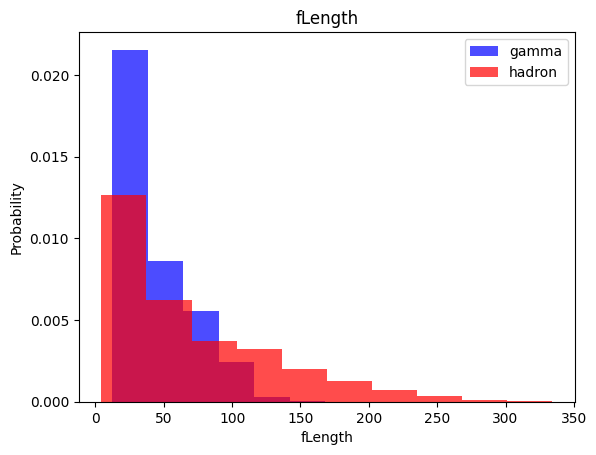

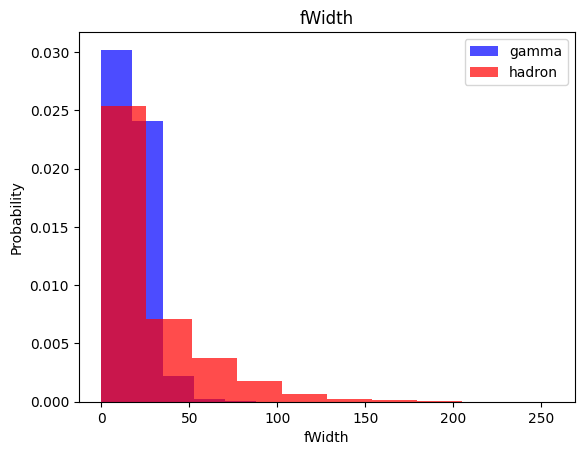

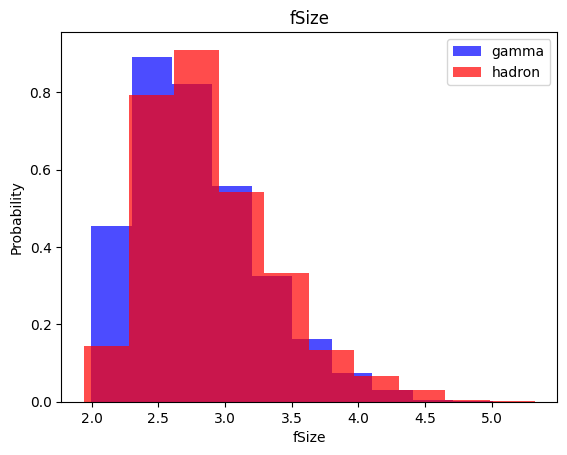

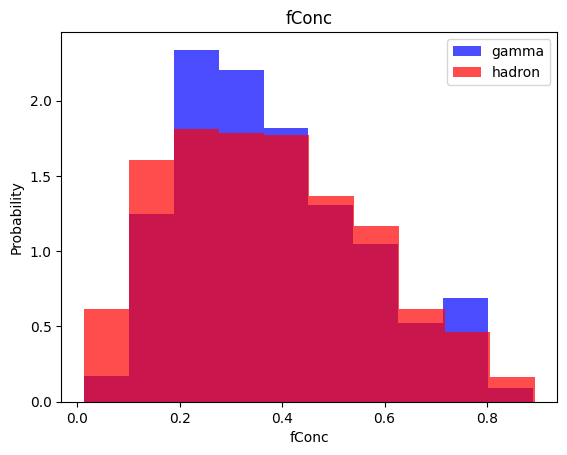

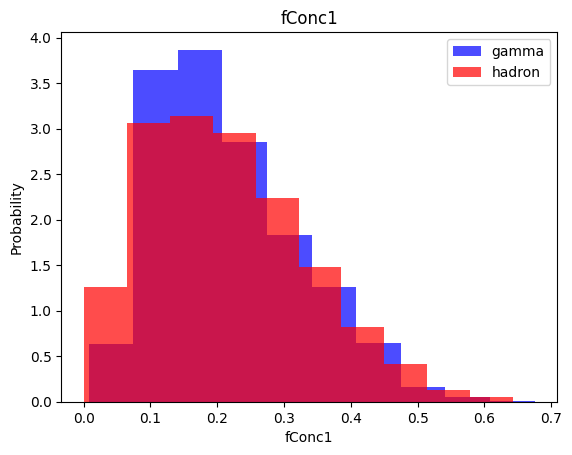

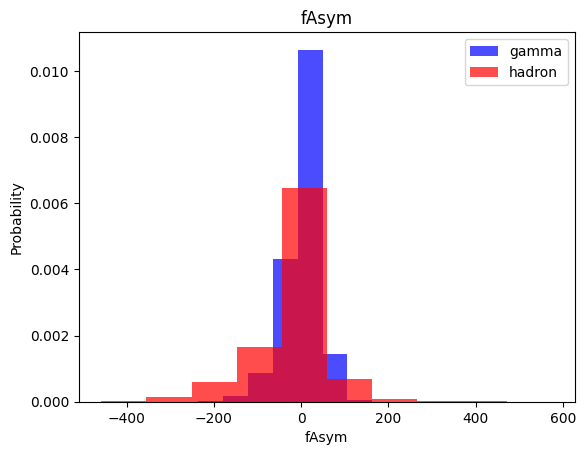

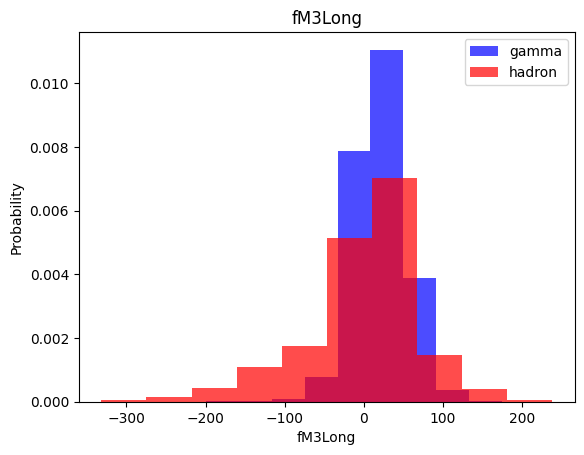

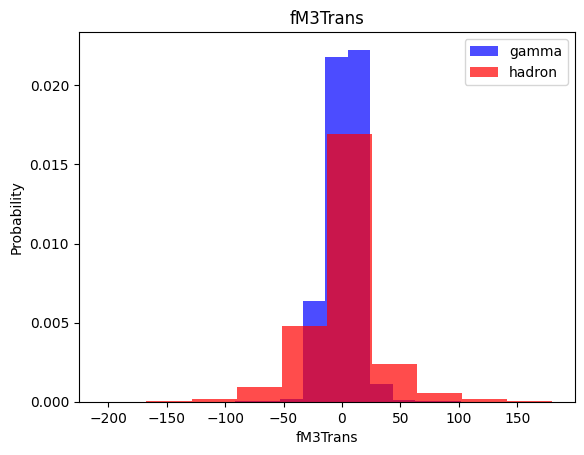

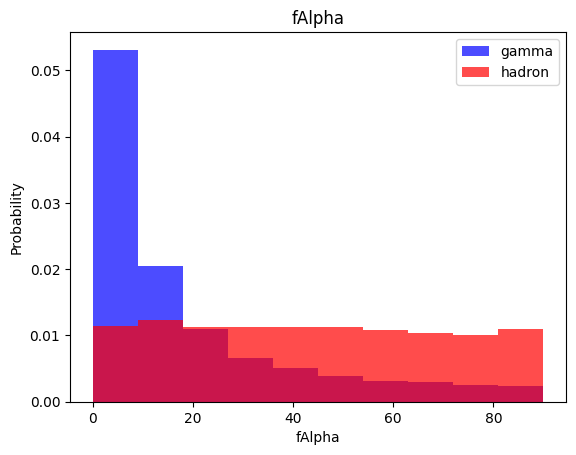

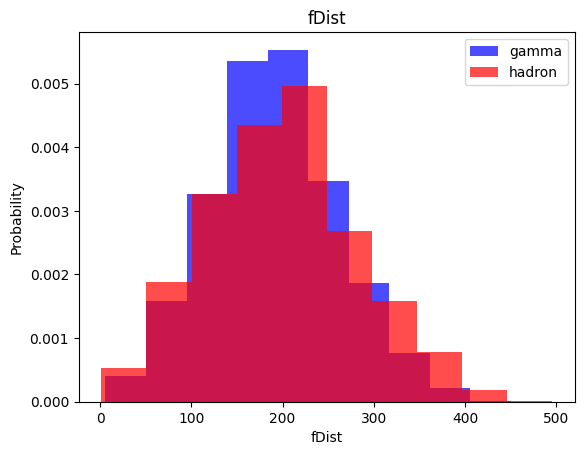

In [ ]:
for labels in cols[:-1]:
  #therefore for everything column label except the last, class.
  #up till the last item
   plt.hist(df[df["class"]==1] [labels], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
   plt.hist(df[df["class"]==0] [labels], color = 'red', label = 'hadron', alpha = 0.7, density = True)
   plt.title(labels)
   plt.ylabel("Probability")
   plt.xlabel(labels)
   plt.legend()
   plt.show()

## Train, Validation and Test Datasets

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
#The frac argument in the sample() method defines the fraction of random items you want to obtain.
#So, if frac=0.5, it will return 50% of the rows.
#here the int argument, first split at 0.6, second at 0.8

In [ ]:
#READ THIS CELL CAREFULLY
#This is a temp function
#WE WILL USE AN UPDATED VERSION BELOW

#we define this function to scale up the values of the columns
#this is due to the fact that some columns have
#incredibly large values, and some have smaller values
def Temp_scale_dataframe(dataframe):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  #understand why X is W and y is y
  #X  - features matrix
  #y - targets vector

  scaler = StandardScaler()
  X = scaler.fit_transform(X)
  #take x and fit the standard scaler to x and that is what our new values will be
  #now we will convert the array (x) into a 2d numpy matrix
  data = np.hstack((X,np.reshape(y, (-1,1))))
  #here x is 2d and y is 1d, so i will update above line to reshape y
  #here -1 tells computer to infer dimension value
  #ends up being lenght of y
  #same as putting (len(y), 1)

  return data, X, y


In [ ]:
#try and run this code
#both and check for the distribution of the old and new version.

In [ ]:
#next up lets just look at the training df for a second
train
print(len(train[train["class"] == 1])) #gamma
print(len(train[train["class"] == 0])) #hadron

#7k Gs and 4k Hs
#there we wanna increase the number Hs to better fit the Gs
#we will use RandomOverSampler




7436
3976


For technical reasons, the number of h events is underestimated. In the real data, the h class represents the majority of the events.

The simple classification accuracy is not meaningful for this data, since classifying a background event as signal is worse than classifying a signal event as background. For comparison of different classifiers an ROC curve has to be used.

In [ ]:
#UPDATED VERSION

def scale_dataframe(dataframe, oversample = False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample: #default arg - True
    ros = RandomOverSampler()
    X,y = ros.fit_resample(X,y)
    #what this does is, take the smaller class and keep sampling to increase the size of our dataset
    #so that they now match

  data = np.hstack((X,np.reshape(y, (-1,1))))


  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataframe(train, oversample = True)

In [ ]:
#only for my reference - unimportant - dont run
Temp_train  = np.reshape(train, (-1,11))
Temp_train
#read into a file and then use pandas, do it later
Temp_train_df = pd.DataFrame(Temp_train, columns = cols)
Temp_train_df

fLength    fWidth     fSize     fConc    fConc1     fAsym   fM3Long  \
0      0.439292  0.359157  0.817522 -1.197259 -1.108888 -0.515711 -1.739766   
1      0.794528  2.568025  2.172704 -1.226771 -1.215556 -1.411375 -0.902596   
2      0.629016  0.730886  1.061298 -0.487334 -0.398374  0.232479 -0.784069   
3     -0.809646 -0.813488 -1.322195  2.264923  2.249333  0.126239 -0.395865   
4     -0.055113  0.814988  2.263007 -1.350283 -1.329455  0.134792  0.567243   
...         ...       ...       ...       ...       ...       ...       ...   
14867 -0.802708 -0.792838 -1.319439  0.702432  0.466718 -0.477075 -0.301829   
14868  0.230162 -0.374787  0.207022 -0.376938 -0.517697  0.108684  0.784768   
14869  1.384722  0.256079  0.148516  0.076671 -0.124473 -1.713400  1.082385   
14870 -0.205201  0.478628  0.214865  0.076124  0.469430  0.151660  0.005220   
14871 -0.387507 -0.715017 -0.144863  0.587117  0.809320  0.508545  0.442185   

       fM3Trans    fAlpha     fDist  class  
0      0.997016  0.070102 -0.168517    0.0  
1      1.673373 -0.855481  2.675644    0.0  
2     -0.895811 -0.978692  1.971377    1.0  
3     -0.123487 -1.002954 -0.455401    1.0  
4      0.681509 -0.336682 -0.773201    1.0  
...         ...       ...       ...    ...  
14867 -0.020952 -0.981076 -1.500618    0.0  
14868  0.409770 -0.405729  1.327109    0.0  
14869 -0.962079  0.408189  0.899808    0.0  
14870 -1.002761 -0.290059  1.788020    0.0  
14871 -0.387606 -1.007462 -1.388537    0.0  

[14872 rows x 11 columns]

In [ ]:
#unimportant - dont run
df

fLength    fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
0       28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.0110   
1       31.6036   11.7235  2.5185  0.5303  0.3773   26.2722   23.8238   
2      162.0520  136.0310  4.0612  0.0374  0.0187  116.7410  -64.8580   
3       23.8172    9.5728  2.3385  0.6147  0.3922   27.2107   -6.4633   
4       75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277   28.5525   
...         ...       ...     ...     ...     ...       ...       ...   
19015   21.3846   10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452    6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455   47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135   76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814   53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
0       -8.2027  40.0920   81.8828      1  
1       -9.9574   6.3609  205.2610      1  
2      -45.2160  76.9600  256.7880      1  
3       -7.1513  10.4490  116.7370      1  
4       21.8393   4.6480  356.4620      1  
...         ...      ...       ...    ...  
19015    2.8766   2.4229  106.8258      0  
19016   -2.9632  86.7975  247.4560      0  
19017   -9.4662  30.2987  256.5166      0  
19018  -63.8389  84.6874  408.3166      0  
19019   31.4755  52.7310  272.3174      0  

[19020 rows x 11 columns]

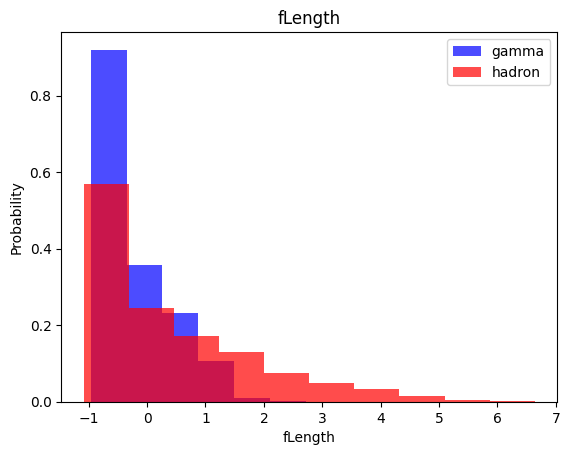

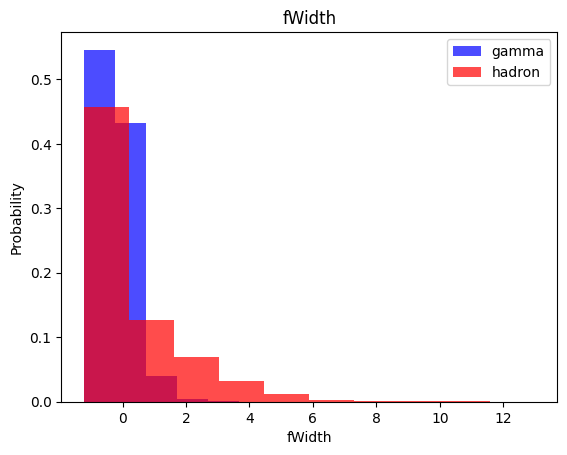

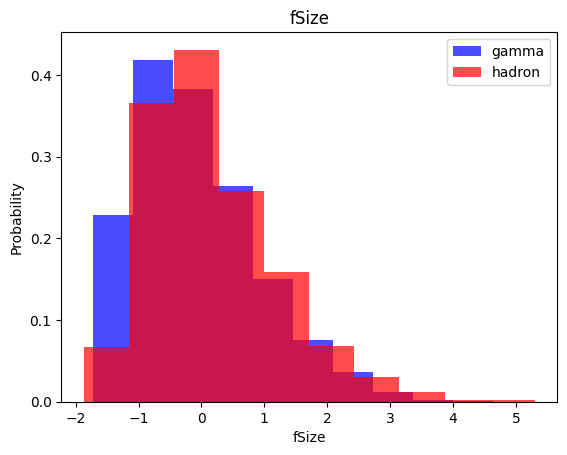

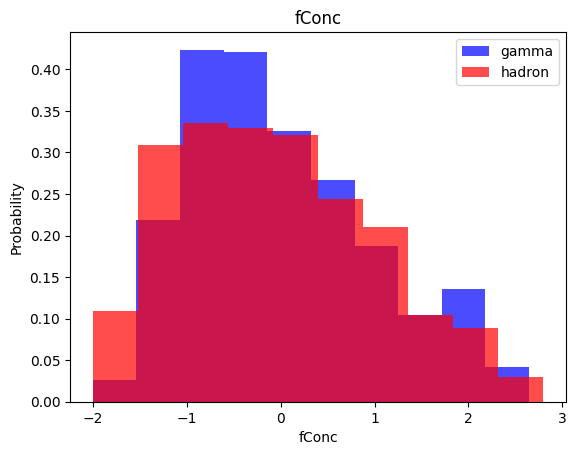

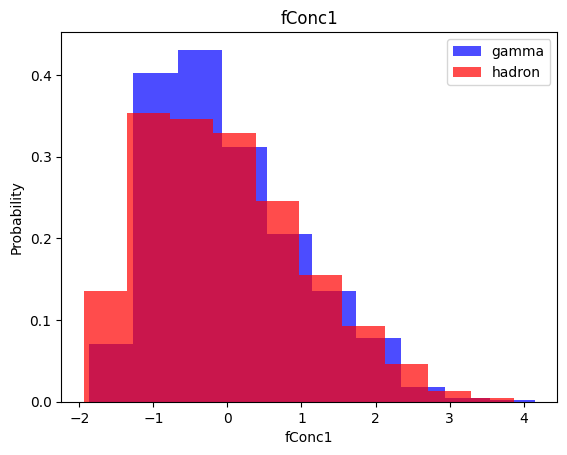

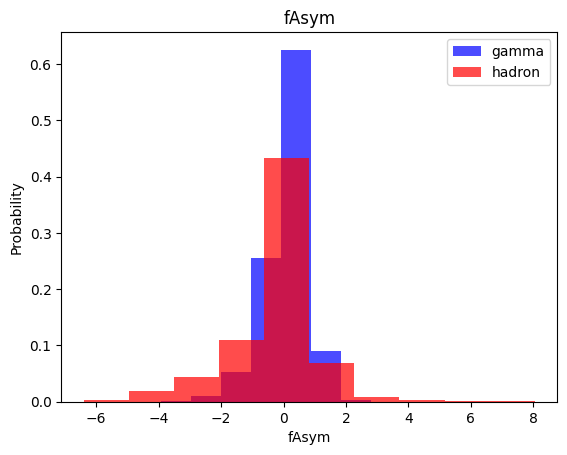

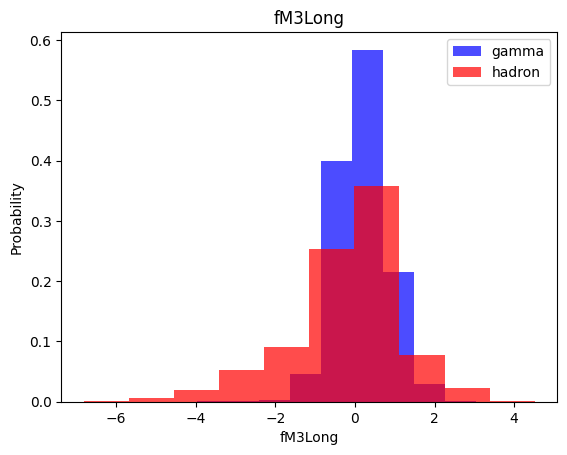

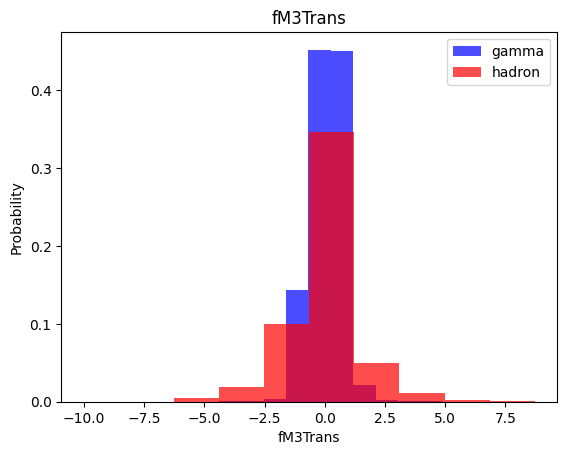

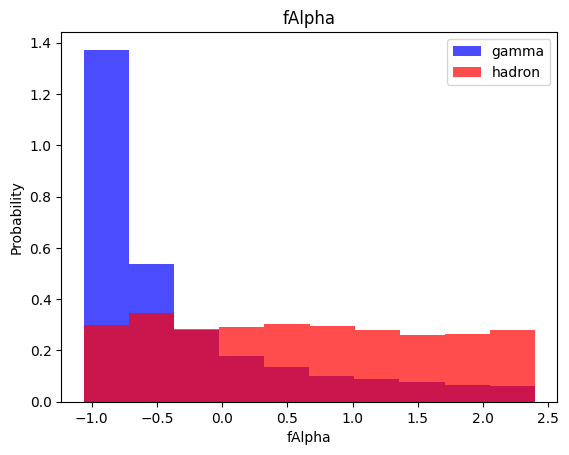

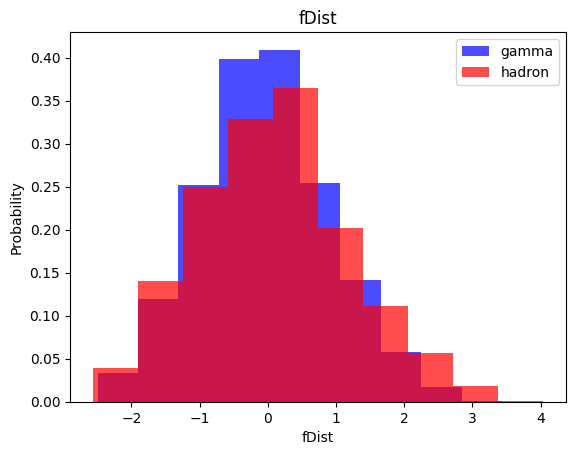

In [ ]:
#unimportant - dont run
for labels in cols[:-1]:
  #therefore for everything column label except the last, class.
  #up till the last item
   plt.hist(Temp_train_df[Temp_train_df["class"]==1.0] [labels], color = 'blue', label = 'gamma', alpha = 0.7, density = True)
   plt.hist(Temp_train_df[Temp_train_df["class"]==0.0] [labels], color = 'red', label = 'hadron', alpha = 0.7, density = True)
   plt.title(labels)
   plt.ylabel("Probability")
   plt.xlabel(labels)
   plt.legend()
   plt.show()

**Only for reference**

So, in the above cell has, the new temporary dataframe has been put through both a RandomOverSampler and StandardScaler, which has helped standardize the dataset to exclude massive variations in data, while still maintaining the overall ratio/picture/proportions. When compared with the original df, there are slight differences (caused by random oversampling) but the overall shape fo the histogram remains the same. Also the Y-axis has been standardized to only have a single decimal point.

In [ ]:
len(y_train)

14872

In [ ]:
print(sum(y_train == 1))
print(sum(y_train == 0))

7436
7436


In [ ]:
print(sum(train == 1))
print(sum(train == 0))

[   0    0    0    0    0    0    0    0    0    0 7436]
[   0    0    0    0    0    0    0    0    0    0 7436]


They are equal now.
They are balanced now.

Lets do the same for all datasets

In [ ]:
valid, X_valid, y_valid = scale_dataframe(valid, oversample = False)
test, X_test, y_test = scale_dataframe(test, oversample = False)

#we switch oversample to false, why?
#reason - we wanna see the performce of our model on the two
#we dont wanna oversample, they have to random
#in order to establish trust in the model

## Time to learn about models

Now we will attempt to use different models to arrive at different outcomes.

## Basic Classification Models

### kNN

K-Nearest Neighbors Algorithm.

The k-nearest neighbors algorithm, also known as KNN or k-NN, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#scikit learn
#M/L Library It features various classification, regression and clustering algorithms
#including support-vector machines, random forests, gradient boosting, k-means and DBSCAN,
#and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred
#predictive values for that dataset

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
y_test
#actual values for that dataset

array([1, 1, 1, ..., 1, 1, 1])

### Classification Report

Lets take a look at classification report provided by sklearn

sklearn.metrics.classification_report is a tool in the Scikit-Learn library that provides a summary of the performance of a classification model.

When you use it, you'll get:

Precision: For each class, it tells you the ratio of true positive predictions to the total positive predictions (true positives + false positives). It answers the question: "Of all the times the model labeled something as Class A, how often was it correct?"

Recall: For each class, it indicates the ratio of true positive predictions to the actual positives in the data (true positives + false negatives). It answers the question: "Of all the actual Class A instances, how many did the model correctly identify?"

F1-Score: A single metric that combines both precision and recall using the harmonic mean. It's especially useful when you want a balance between precision and recall.

Support: The number of actual occurrences of each class in the specified dataset.

Micro, Macro, and Weighted averages: These are different ways to average the precision, recall, and F1-score:

Micro: Globally count total true positives, false negatives, and false positives.
Macro: Average the unweighted metric scores for each class.
Weighted: Average the metric scores of each class, considering the number of true instances for each label (support).
In Simple Terms:
classification_report gives you a quick overview of how well your classification model is doing for each class. It tells you about its accuracy in labeling, how often it misses, and provides a combined performance score, all neatly summarized in a table.

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1347
           1       0.83      0.89      0.86      2457

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Describing it, accuracy is 81% not too bad. We got that many right.

On precision and recall, look at: https://en.wikipedia.org/wiki/Precision_and_recall


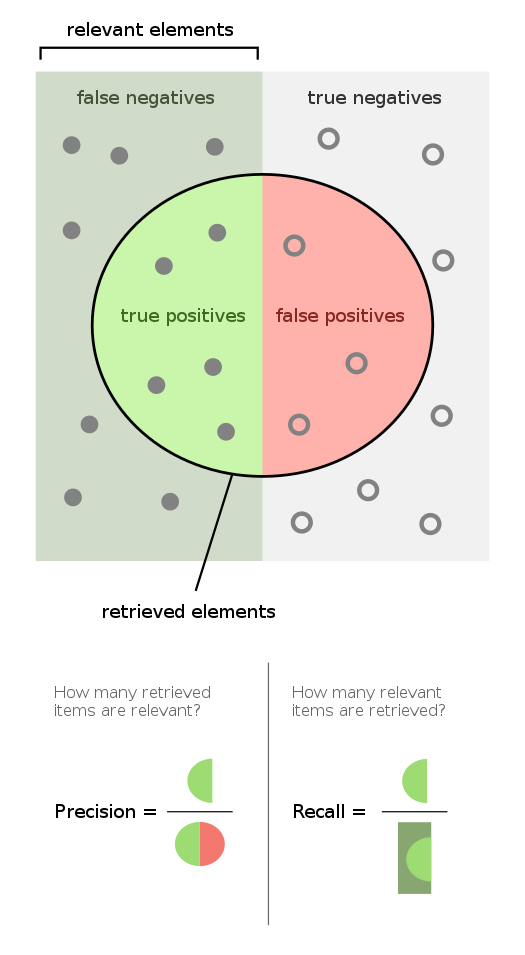


Precision: It tells you how accurate your model is when it claims a data point belongs to a certain class. In other words, when the model says "This is Class A", how often is it actually right?

Recall: It indicates how good your model is at capturing all the data points of a certain class. That is, out of all the data points that truly are "Class A", how many did the model correctly identify?

In Simple Terms:
Imagine you have a basket of fruits, and you're trying to pick out all the apples.

Precision: Out of all the fruits you claimed were apples, how many were actually apples?

Recall: Out of all the real apples in the basket, how many did you manage to pick out?

*Now, what if made the k = 3, instead of 1*

**Difference Example:**

Imagine you have an alarm system to detect burglars.

It goes off 8 times: 5 times for actual burglars and 3 times because of a cat.
There were a total of 7 burglars that night, so the alarm missed 2 burglars.
Precision:
Out of the 8 alarms, only 5 were actual burglars.
Precision = 5/8 = 62.5%
(When the alarm rings, it's right 62.5% of the time.)

Recall:
Out of the 7 actual burglars, the alarm detected 5.
Recall = 5/7 ≈ 71.4%
(The alarm caught 71.4% of the burglars.)

Simple Takeaway:
Precision: When the system makes a claim (like sounding the alarm), how trustworthy is it?

Recall: How good is the system at not missing real incidents (like actual burglars)?







In [ ]:
knn_model_1 = KNeighborsClassifier(n_neighbors = 3)
knn_model_1.fit(X_train, y_train)
y_pred_1 = knn_model_1.predict(X_test)
print(classification_report(y_test, y_pred_1))


              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1347
           1       0.85      0.85      0.85      2457

    accuracy                           0.81      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.81      0.81      0.81      3804



Increased the F1 scores, but overall accuracy the same. We have some improvement. Now lets use k = 5.


In [ ]:
knn_model_2 = KNeighborsClassifier(n_neighbors = 5)
knn_model_2.fit(X_train, y_train)
y_pred_2 = knn_model_2.predict(X_test)
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

           0       0.75      0.73      0.74      1347
           1       0.85      0.87      0.86      2457

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



More improvements, accuracy is the same.
And there ya have it. Works for a simple model decently well at 81%.

In [ ]:
knn_model_3 = KNeighborsClassifier(n_neighbors = 50)
knn_model_3.fit(X_train, y_train)
y_pred_3 = knn_model_3.predict(X_test)
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      1347
           1       0.86      0.90      0.88      2457

    accuracy                           0.84      3804
   macro avg       0.83      0.82      0.82      3804
weighted avg       0.84      0.84      0.84      3804



Using 50 k-neighbours, our accuracy statistics jump up massively.

However, at 100, it reduces. Might wanna create a function that results in the ideal number of neighbors to use in order to get the most ideal outcome.

At 1000, it reduces massively.

### Naive Bayes Model

Refer the Onenote Notes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred_nb = nb_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.68      0.40      0.51      1347
           1       0.73      0.89      0.80      2457

    accuracy                           0.72      3804
   macro avg       0.70      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



Accuracy has dropped. Therefore, probability not a better predictive model.

### Logistic Regression

This type of statistical model (also known as logit model) is often used for classification and predictive analytics. Logistic regression estimates the probability of an event occurring, such as voted or didn’t vote, based on a given dataset of independent variables. Since the outcome is a probability, the dependent variable is bounded between 0 and 1.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
#here one of the parameters is penalty
#we are using an L2 penalty
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred_lg = lg_model.predict(X_test)
print(classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      1347
           1       0.84      0.81      0.83      2457

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.78      0.78      3804



Performs sligtly better than NB but not kNN

### SVM - Support Vector Machine

Look into Onenote

In [ ]:
from sklearn.svm import SVC
#the SVC - Support Vector Classifier

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      1347
           1       0.89      0.91      0.90      2457

    accuracy                           0.87      3804
   macro avg       0.86      0.85      0.85      3804
weighted avg       0.87      0.87      0.87      3804



High accuracy of around 86%

## Neural Networks - Classification

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history_lossaccuracy(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)


  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation = 'relu', input_shape = (10,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')]
)

#this says, layer that everything I'm about to pass in
#say we have 32 units in this Dense Layer, which is our first layer
#second layer is another dense with 32 units and relu activation only, no shape
#final one is an output layer, give us an answer between 0-1

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy',
                                                    metrics = ['accuracy'])
#adam learning rate is 0.001, we used the default value



In [ ]:
#training
#tf keeps track of history of training, which is why we can plot it
history = nn_model.fit(
    X_train, y_train,
    epochs = 100, batch_size = 32,
    validation_split = 0.2, #this is just the fraction of the training data to be used as the validation data, we see how the model works on the 20% left out
    verbose = 0 #we dont wanna print it complete a 100 epochs [tip: try running it without the verbose argument and see]
)

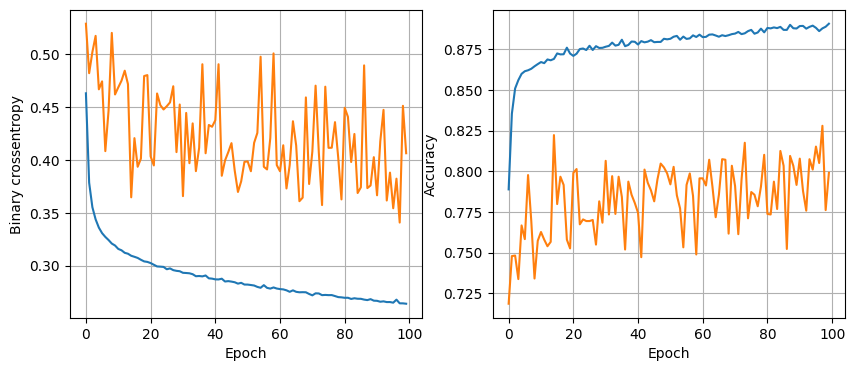

In [ ]:
plot_history_lossaccuracy(history)

Let's try to change certain aspects of the model to try and arrive at a different outcome.
And lets make it a function.
Same code as above, just inside of a defined function.

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)), #first change
    tf.keras.layers.Dropout(dropout_prob), #this says randomly choose at a certain rate, nodes, and don't train them, to prevent overfitting
    tf.keras.layers.Dense(num_nodes, activation = 'relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation = 'sigmoid')]
                                 )

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss = 'binary_crossentropy',
                                                    metrics = ['accuracy'])
  history = nn_model.fit(
    X_train, y_train,
    epochs = epochs, batch_size = batch_size,
    validation_split = 0.2,
    verbose = 0
    )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


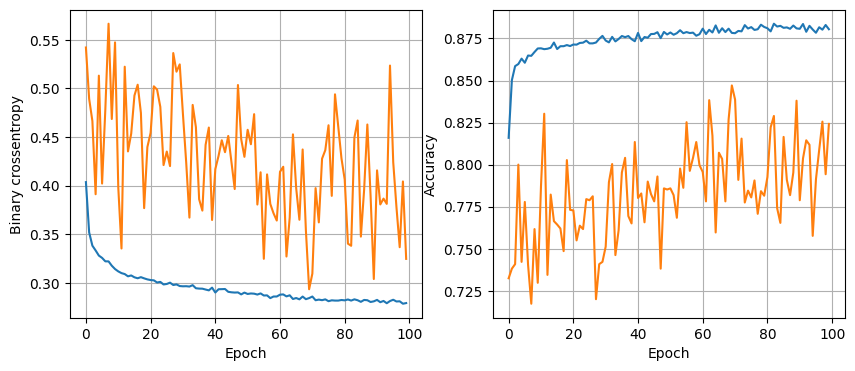

119/119 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8638
16 nodes, dropout 0, lr 0.01, batch size 64


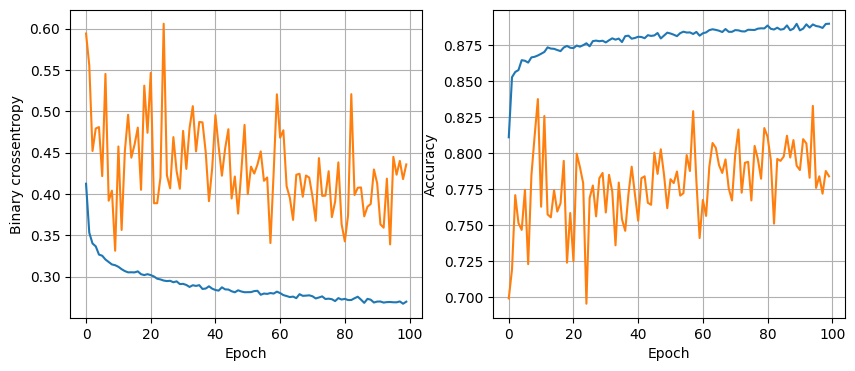

119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8678
16 nodes, dropout 0, lr 0.01, batch size 128


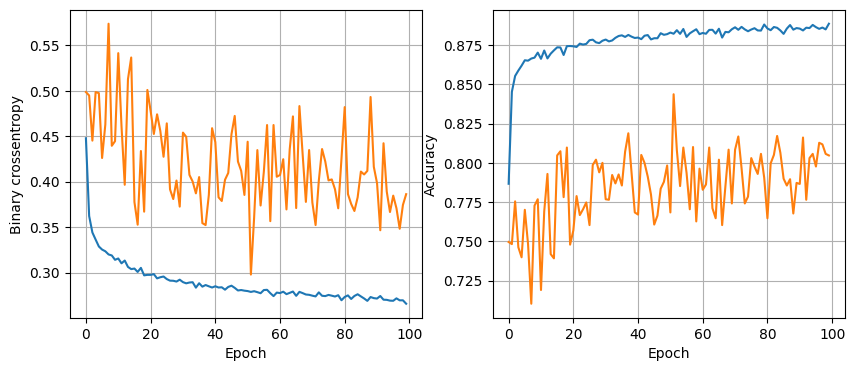

119/119 [==============================] - 0s 2ms/step - loss: 0.3090 - accuracy: 0.8778
16 nodes, dropout 0, lr 0.005, batch size 32


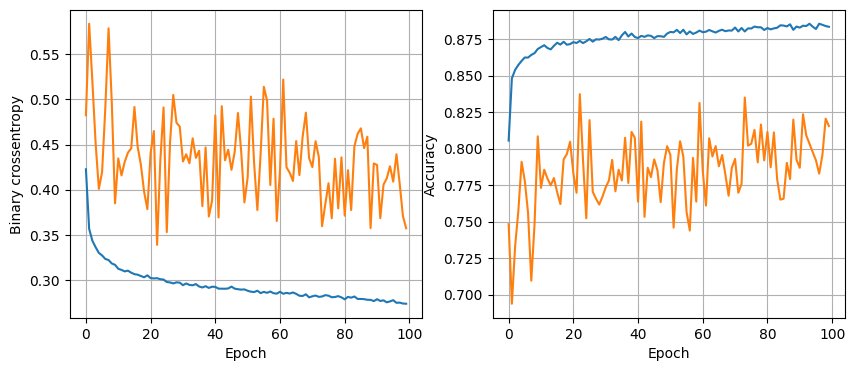

119/119 [==============================] - 0s 2ms/step - loss: 0.3238 - accuracy: 0.8678
16 nodes, dropout 0, lr 0.005, batch size 64


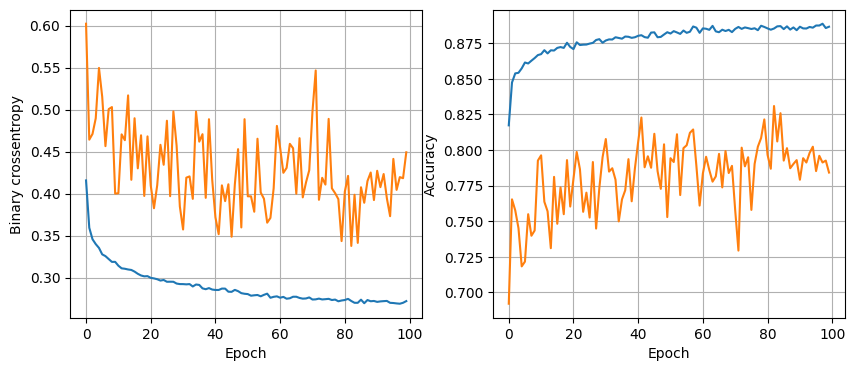

119/119 [==============================] - 0s 3ms/step - loss: 0.3080 - accuracy: 0.8764
16 nodes, dropout 0, lr 0.005, batch size 128


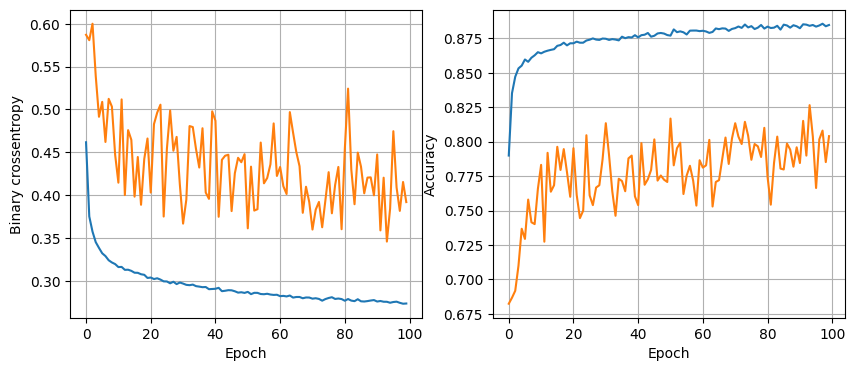

119/119 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8672
16 nodes, dropout 0, lr 0.001, batch size 32


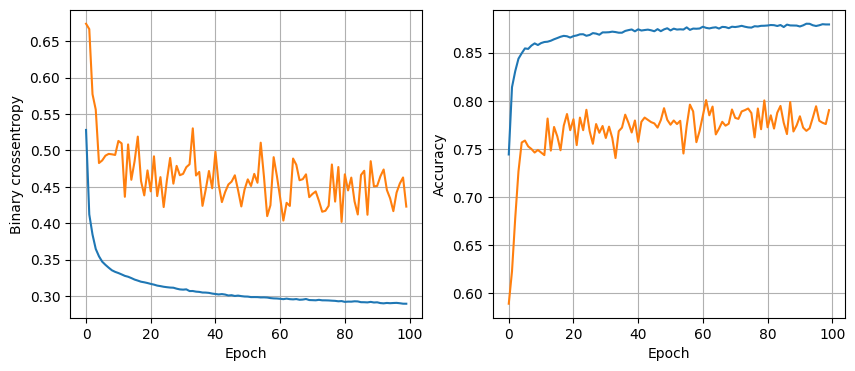

119/119 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.8691
16 nodes, dropout 0, lr 0.001, batch size 64


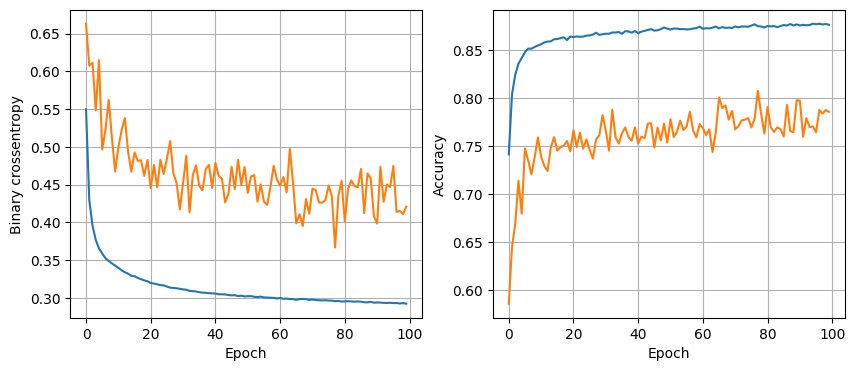

119/119 [==============================] - 0s 2ms/step - loss: 0.3197 - accuracy: 0.8688
16 nodes, dropout 0, lr 0.001, batch size 128


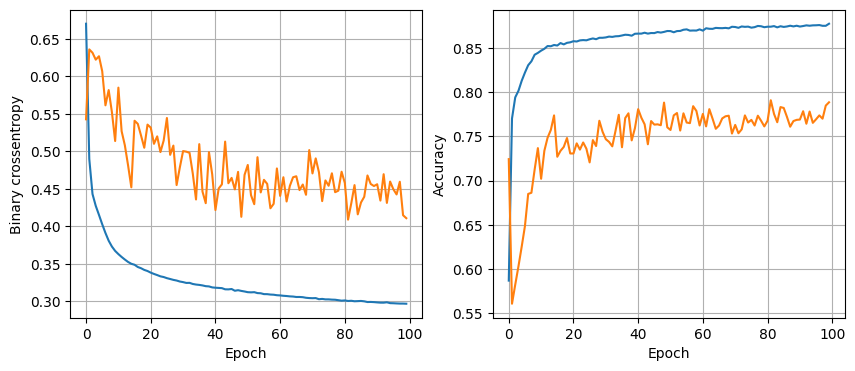

119/119 [==============================] - 0s 3ms/step - loss: 0.3202 - accuracy: 0.8704
16 nodes, dropout 0.2, lr 0.01, batch size 32


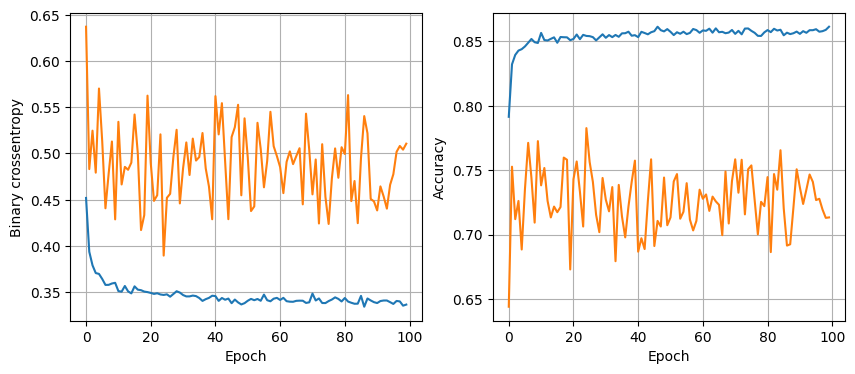

119/119 [==============================] - 0s 2ms/step - loss: 0.3202 - accuracy: 0.8651
16 nodes, dropout 0.2, lr 0.01, batch size 64


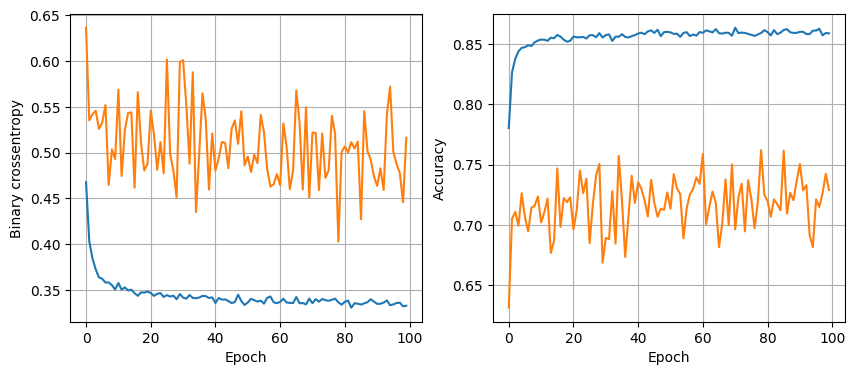

119/119 [==============================] - 0s 3ms/step - loss: 0.3181 - accuracy: 0.8638
16 nodes, dropout 0.2, lr 0.01, batch size 128


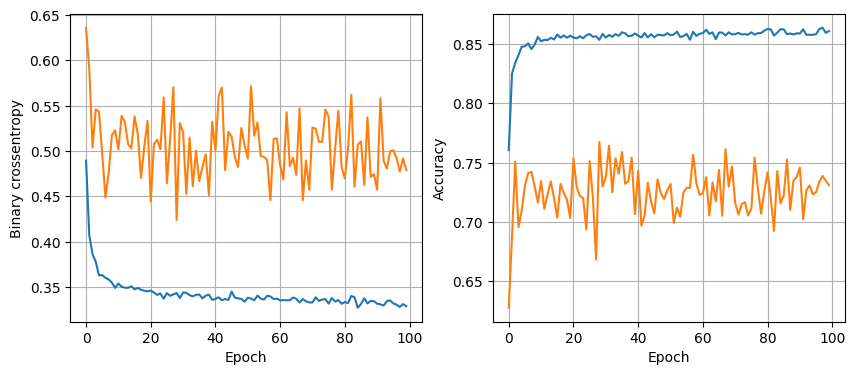

119/119 [==============================] - 0s 2ms/step - loss: 0.3182 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.005, batch size 32


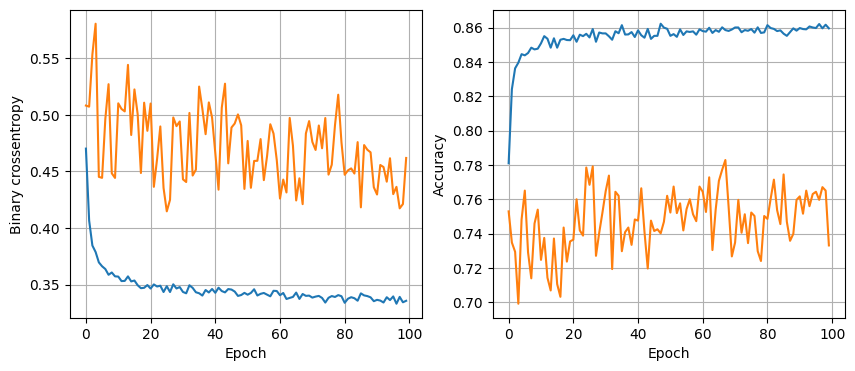

119/119 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.8659
16 nodes, dropout 0.2, lr 0.005, batch size 64


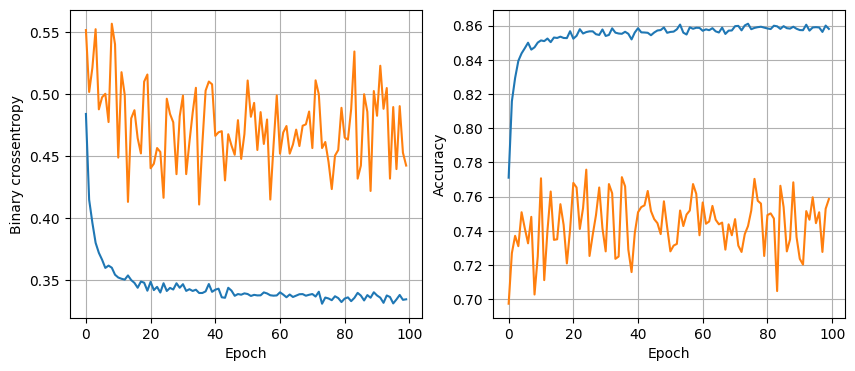

119/119 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8693
16 nodes, dropout 0.2, lr 0.005, batch size 128


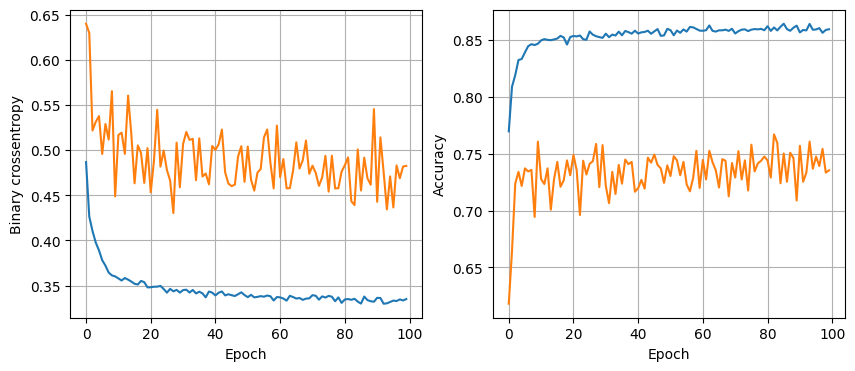

119/119 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8654
16 nodes, dropout 0.2, lr 0.001, batch size 32


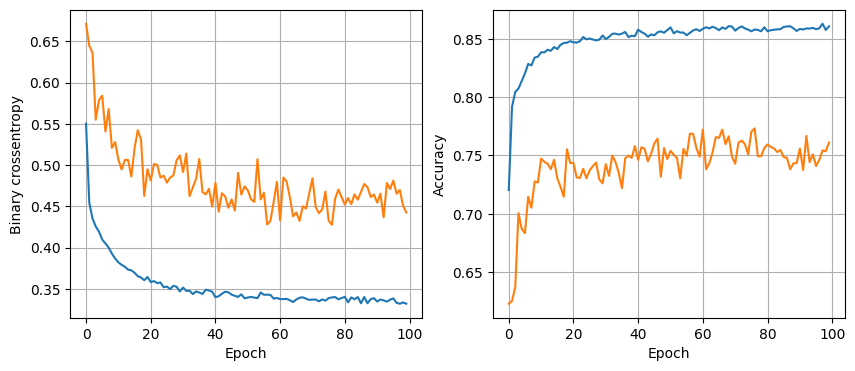

119/119 [==============================] - 0s 2ms/step - loss: 0.3175 - accuracy: 0.8712
16 nodes, dropout 0.2, lr 0.001, batch size 64


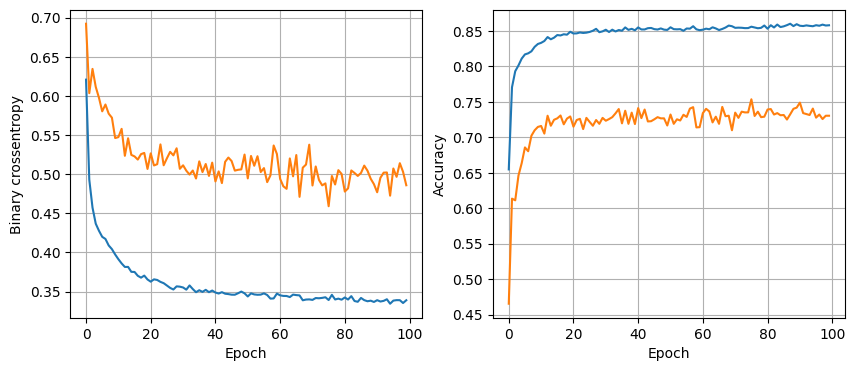

119/119 [==============================] - 0s 3ms/step - loss: 0.3212 - accuracy: 0.8667
16 nodes, dropout 0.2, lr 0.001, batch size 128


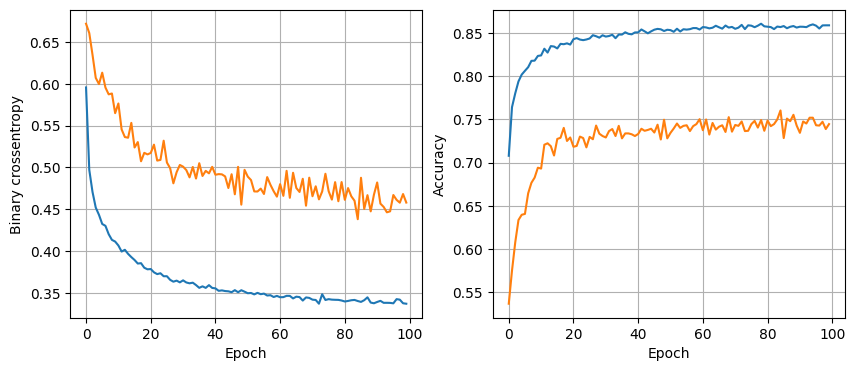

119/119 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8725
32 nodes, dropout 0, lr 0.01, batch size 32


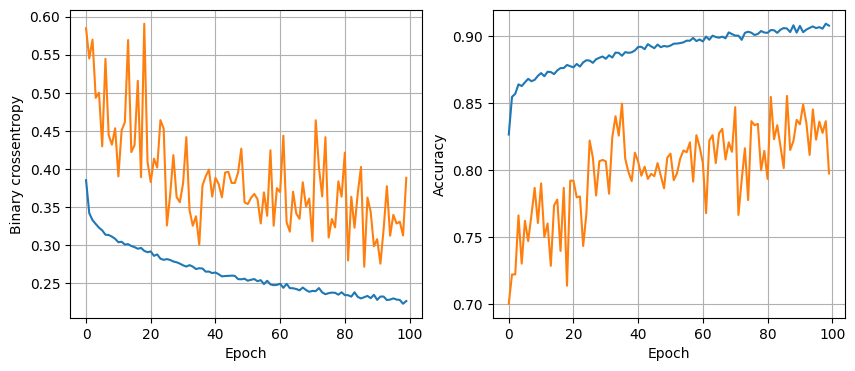

119/119 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8641
32 nodes, dropout 0, lr 0.01, batch size 64


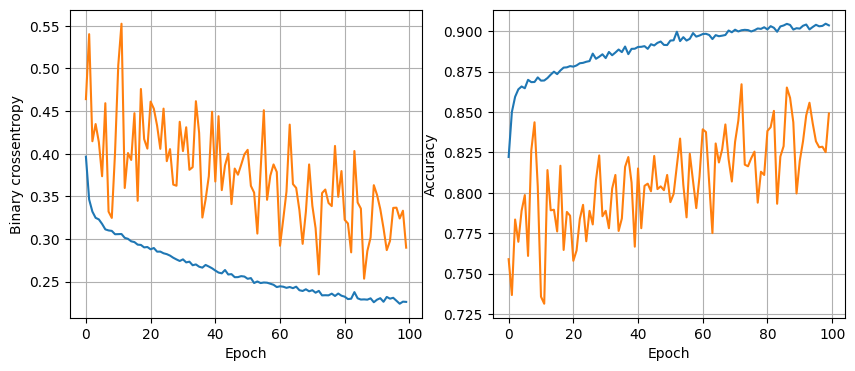

119/119 [==============================] - 0s 2ms/step - loss: 0.3751 - accuracy: 0.8633
32 nodes, dropout 0, lr 0.01, batch size 128


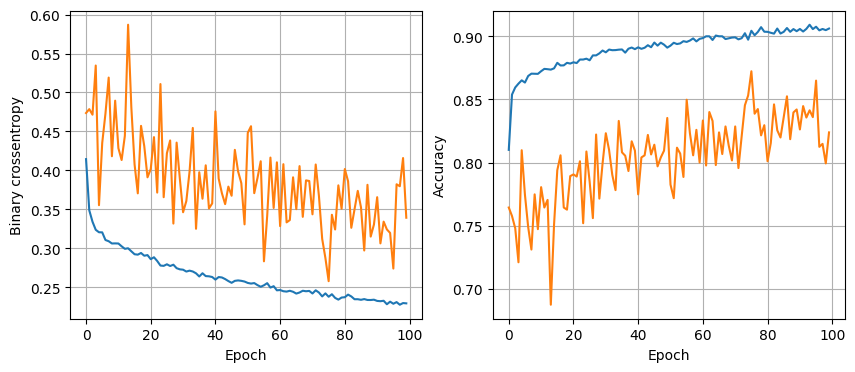

119/119 [==============================] - 0s 3ms/step - loss: 0.3469 - accuracy: 0.8686
32 nodes, dropout 0, lr 0.005, batch size 32


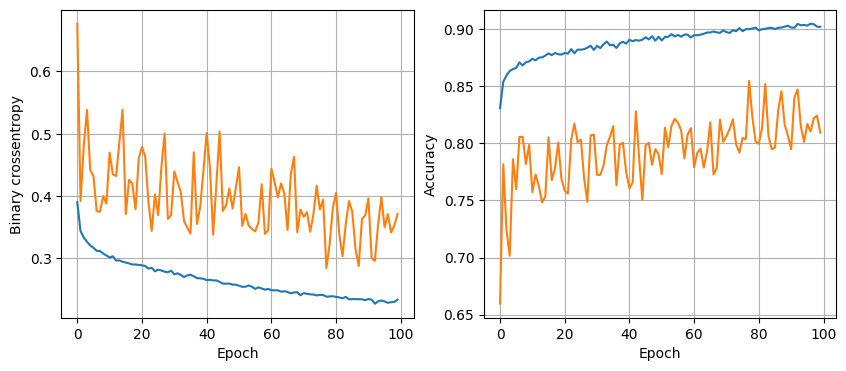

119/119 [==============================] - 0s 2ms/step - loss: 0.3601 - accuracy: 0.8636
32 nodes, dropout 0, lr 0.005, batch size 64


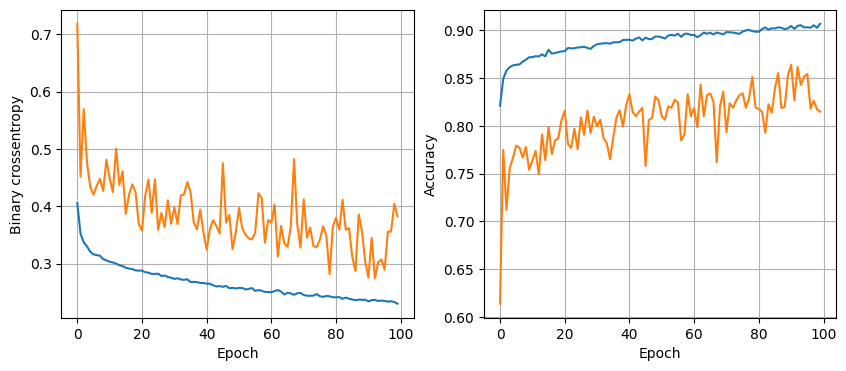

119/119 [==============================] - 0s 3ms/step - loss: 0.3459 - accuracy: 0.8654
32 nodes, dropout 0, lr 0.005, batch size 128


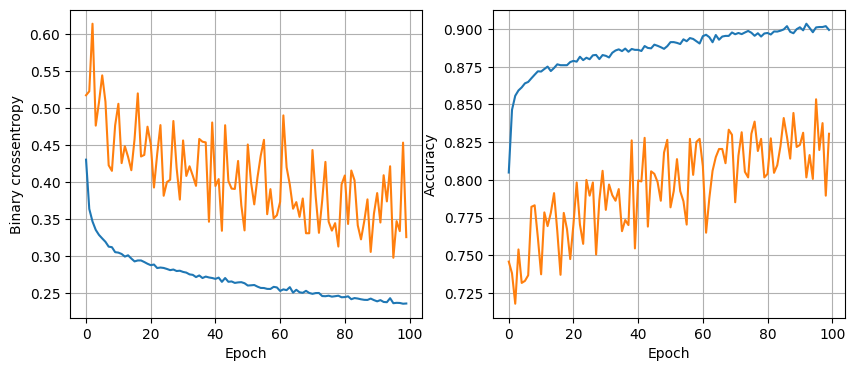

119/119 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8617
32 nodes, dropout 0, lr 0.001, batch size 32


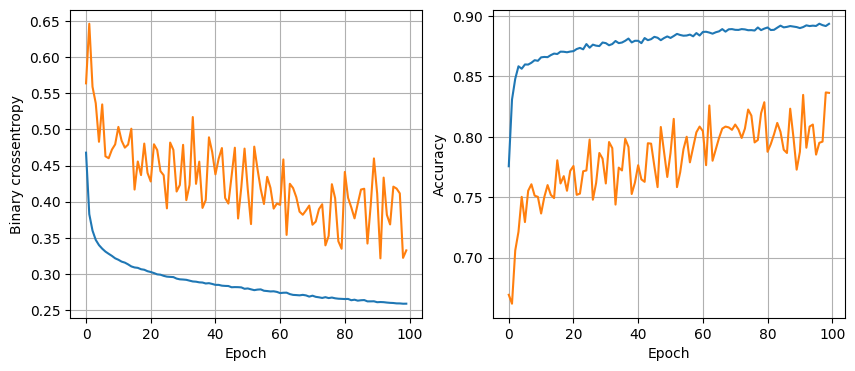

119/119 [==============================] - 0s 3ms/step - loss: 0.3191 - accuracy: 0.8678
32 nodes, dropout 0, lr 0.001, batch size 64


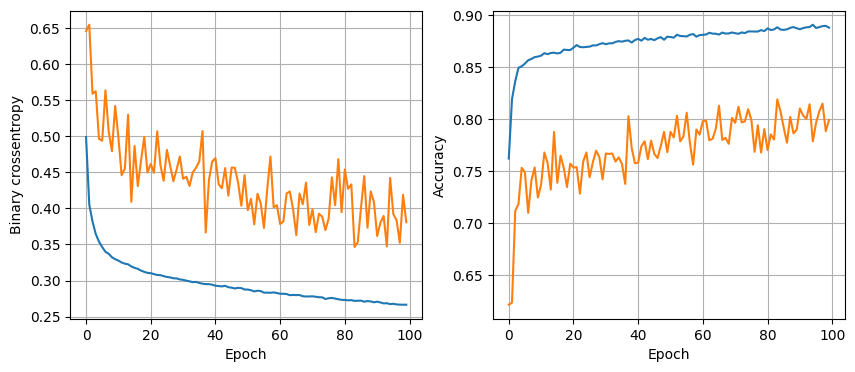

119/119 [==============================] - 0s 3ms/step - loss: 0.3187 - accuracy: 0.8709
32 nodes, dropout 0, lr 0.001, batch size 128


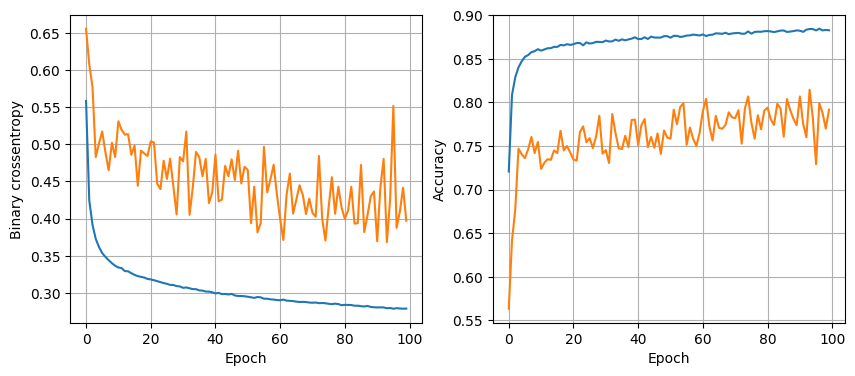

119/119 [==============================] - 1s 4ms/step - loss: 0.3102 - accuracy: 0.8736
32 nodes, dropout 0.2, lr 0.01, batch size 32


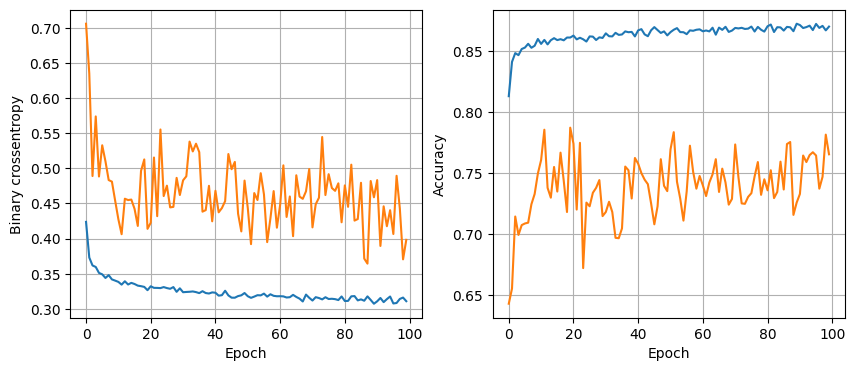

119/119 [==============================] - 0s 3ms/step - loss: 0.3198 - accuracy: 0.8688
32 nodes, dropout 0.2, lr 0.01, batch size 64


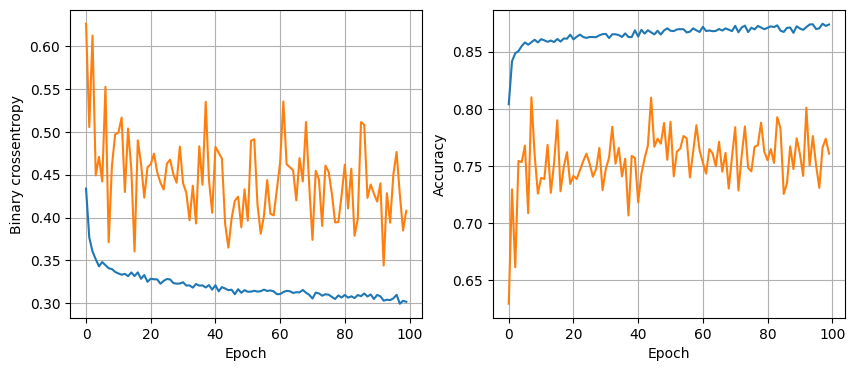

119/119 [==============================] - 0s 2ms/step - loss: 0.3115 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.01, batch size 128


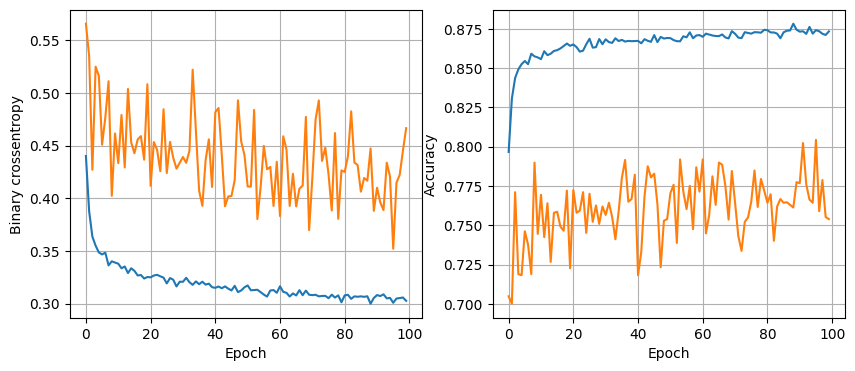

119/119 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8749
32 nodes, dropout 0.2, lr 0.005, batch size 32


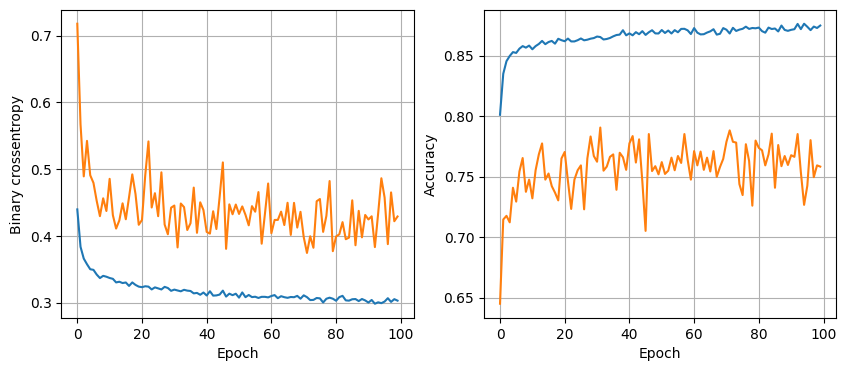

119/119 [==============================] - 0s 2ms/step - loss: 0.3072 - accuracy: 0.8707
32 nodes, dropout 0.2, lr 0.005, batch size 64


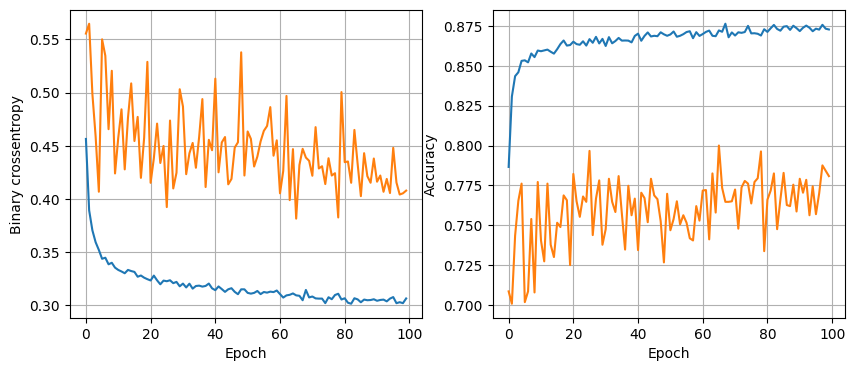

119/119 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.8725
32 nodes, dropout 0.2, lr 0.005, batch size 128


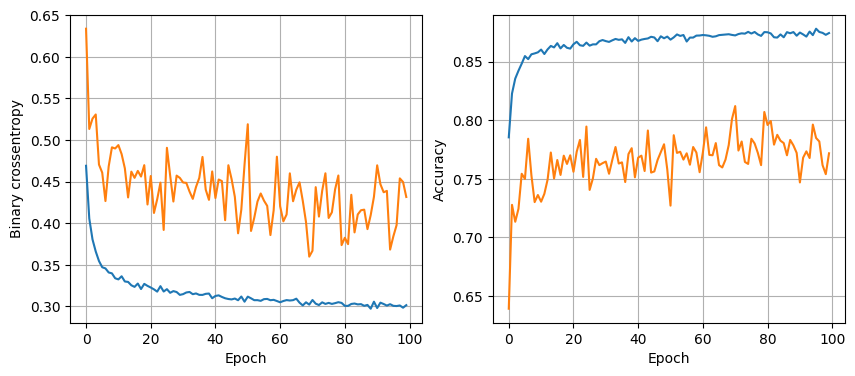

119/119 [==============================] - 0s 3ms/step - loss: 0.3079 - accuracy: 0.8741
32 nodes, dropout 0.2, lr 0.001, batch size 32


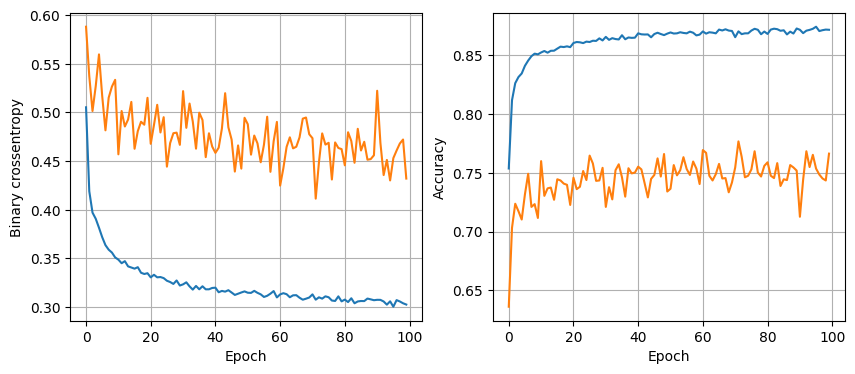

119/119 [==============================] - 0s 3ms/step - loss: 0.3081 - accuracy: 0.8704
32 nodes, dropout 0.2, lr 0.001, batch size 64


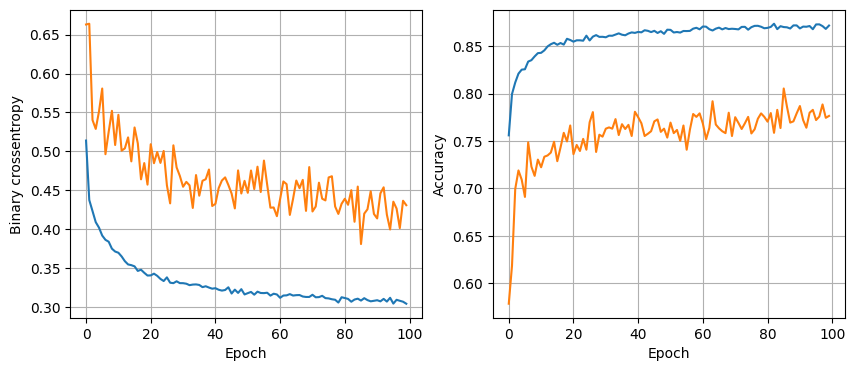

119/119 [==============================] - 0s 3ms/step - loss: 0.3083 - accuracy: 0.8722
32 nodes, dropout 0.2, lr 0.001, batch size 128


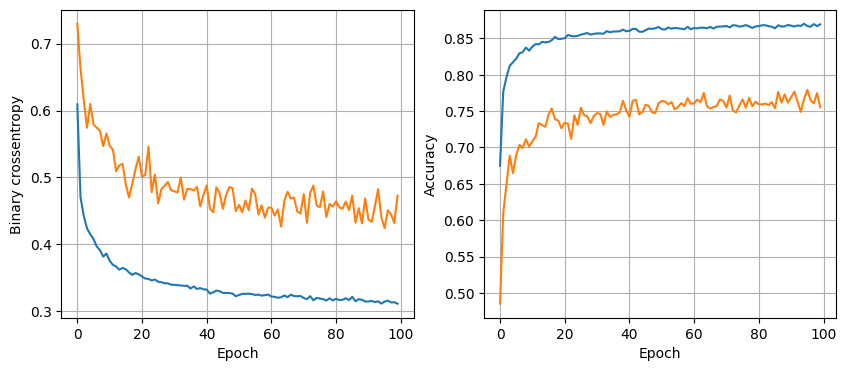

119/119 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8707
64 nodes, dropout 0, lr 0.01, batch size 32


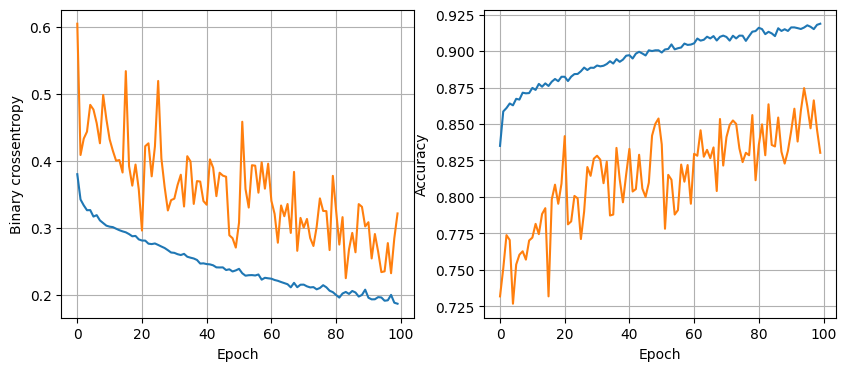

119/119 [==============================] - 0s 3ms/step - loss: 0.5425 - accuracy: 0.8670
64 nodes, dropout 0, lr 0.01, batch size 64


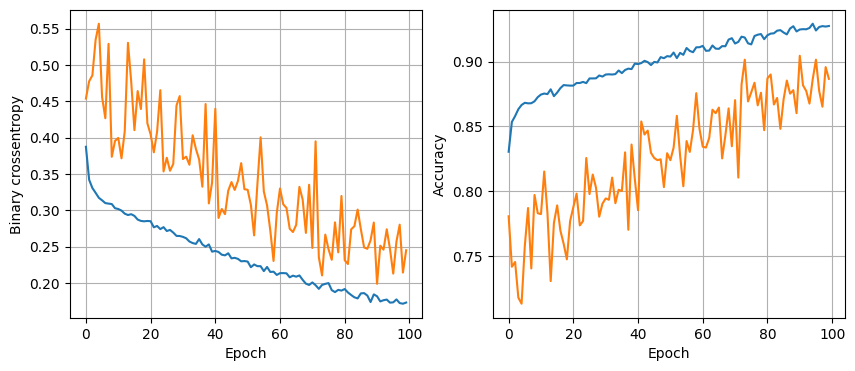

119/119 [==============================] - 0s 3ms/step - loss: 0.5252 - accuracy: 0.8541
64 nodes, dropout 0, lr 0.01, batch size 128


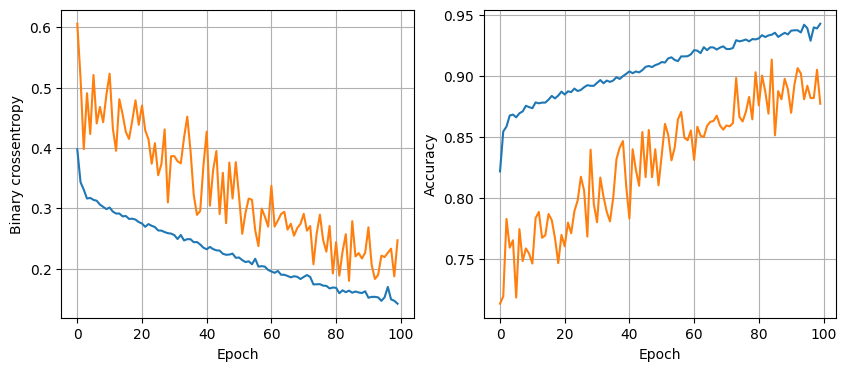

119/119 [==============================] - 0s 3ms/step - loss: 0.6168 - accuracy: 0.8538
64 nodes, dropout 0, lr 0.005, batch size 32


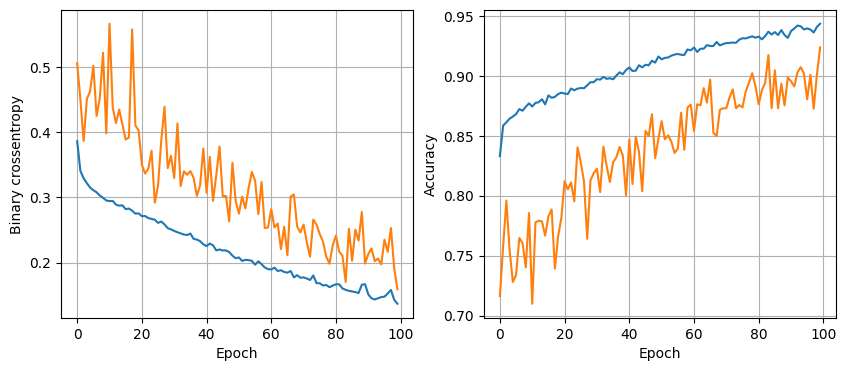

119/119 [==============================] - 1s 4ms/step - loss: 0.6104 - accuracy: 0.8570
64 nodes, dropout 0, lr 0.005, batch size 64


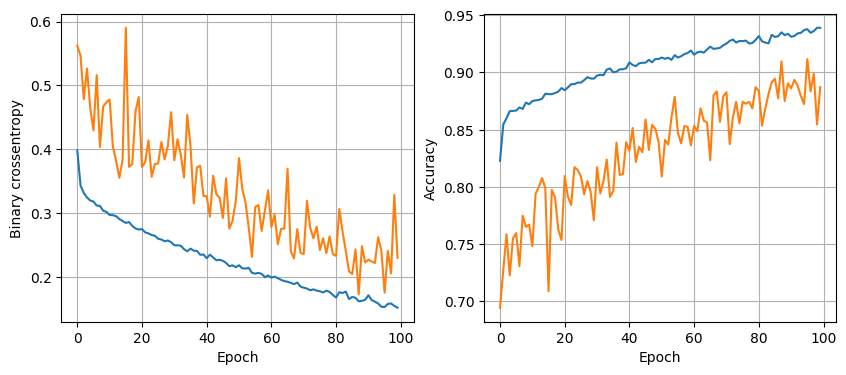

119/119 [==============================] - 0s 3ms/step - loss: 0.5147 - accuracy: 0.8609
64 nodes, dropout 0, lr 0.005, batch size 128


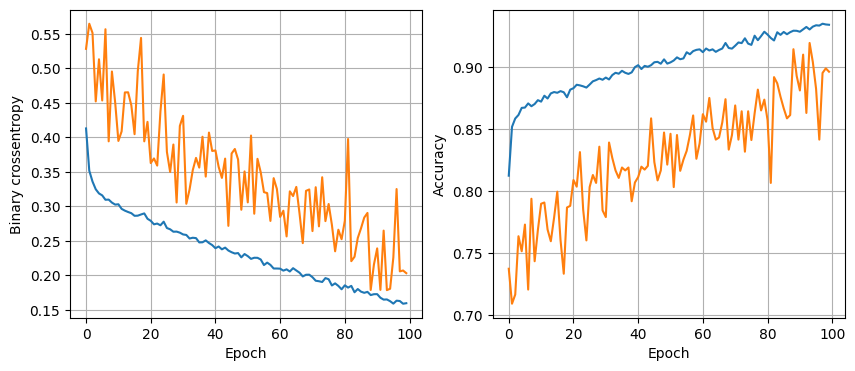

119/119 [==============================] - 0s 3ms/step - loss: 0.4445 - accuracy: 0.8578
64 nodes, dropout 0, lr 0.001, batch size 32


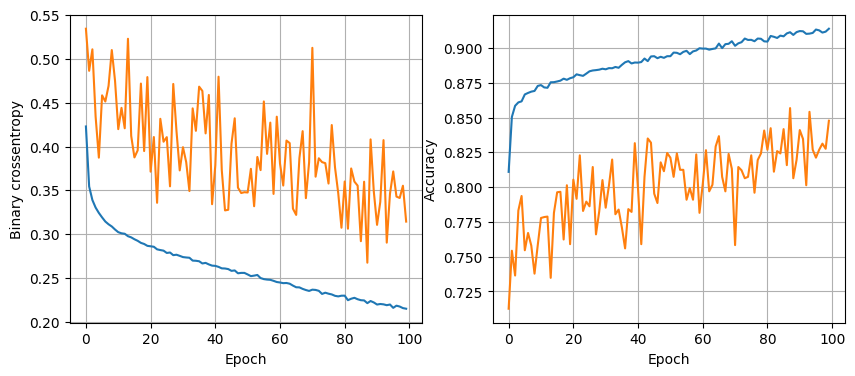

119/119 [==============================] - 0s 3ms/step - loss: 0.3334 - accuracy: 0.8675
64 nodes, dropout 0, lr 0.001, batch size 64


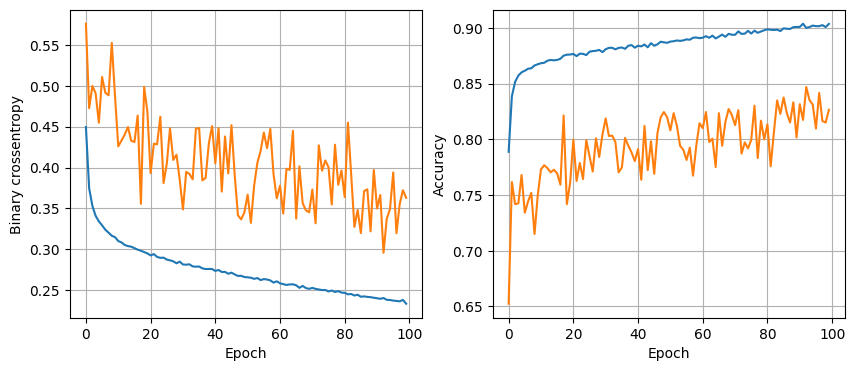

119/119 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.8722
64 nodes, dropout 0, lr 0.001, batch size 128


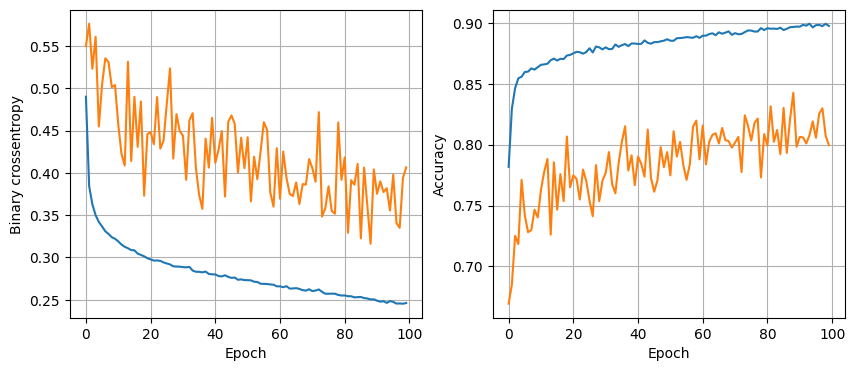

119/119 [==============================] - 0s 3ms/step - loss: 0.3151 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.01, batch size 32


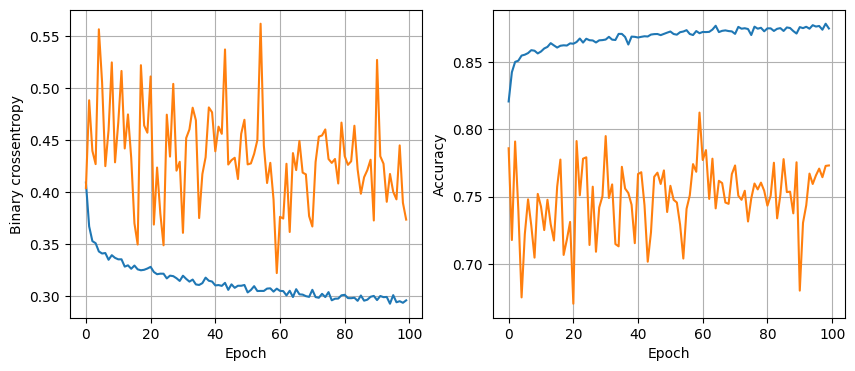

119/119 [==============================] - 0s 3ms/step - loss: 0.3212 - accuracy: 0.8670
64 nodes, dropout 0.2, lr 0.01, batch size 64


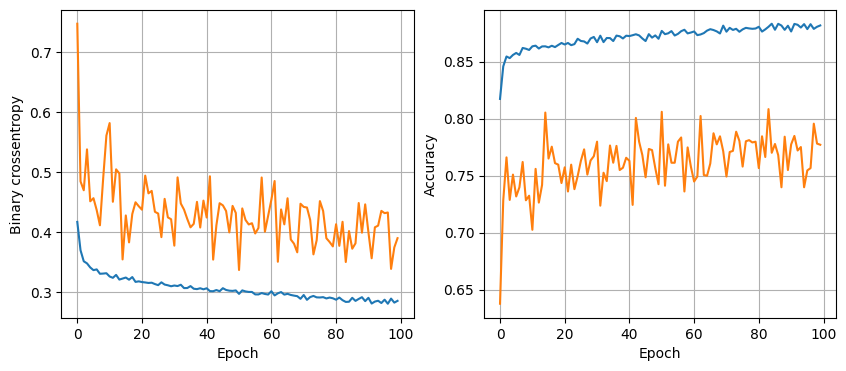

119/119 [==============================] - 0s 3ms/step - loss: 0.3062 - accuracy: 0.8754
64 nodes, dropout 0.2, lr 0.01, batch size 128


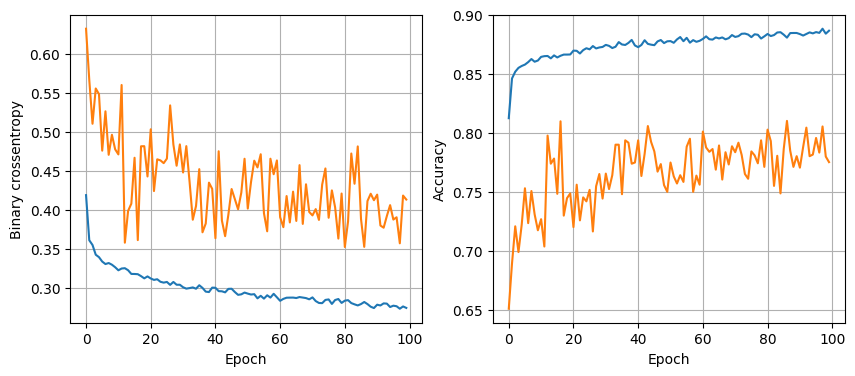

119/119 [==============================] - 0s 3ms/step - loss: 0.3013 - accuracy: 0.8757
64 nodes, dropout 0.2, lr 0.005, batch size 32


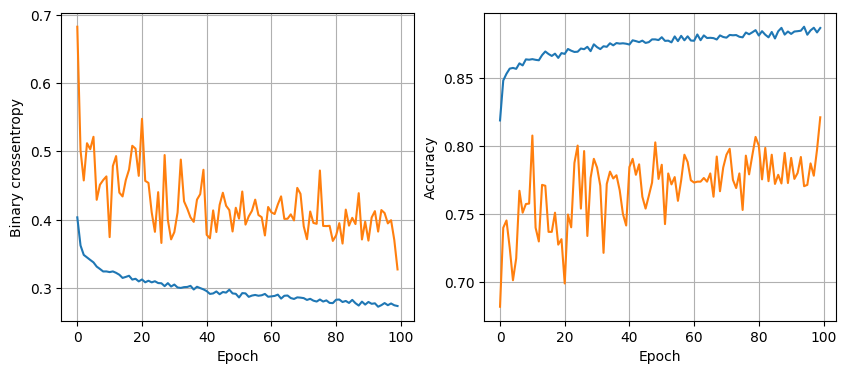

119/119 [==============================] - 0s 3ms/step - loss: 0.3158 - accuracy: 0.8688
64 nodes, dropout 0.2, lr 0.005, batch size 64


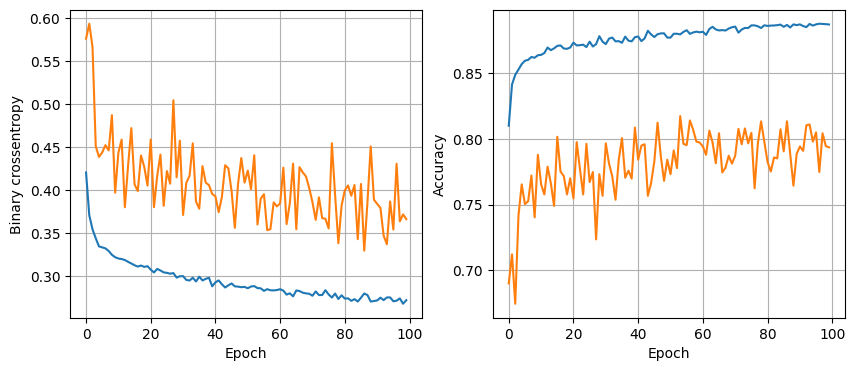

119/119 [==============================] - 0s 3ms/step - loss: 0.3030 - accuracy: 0.8796
64 nodes, dropout 0.2, lr 0.005, batch size 128


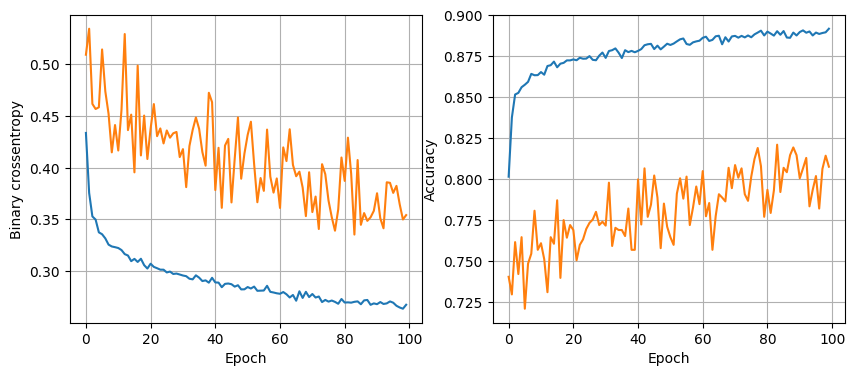

119/119 [==============================] - 0s 2ms/step - loss: 0.2996 - accuracy: 0.8801
64 nodes, dropout 0.2, lr 0.001, batch size 32


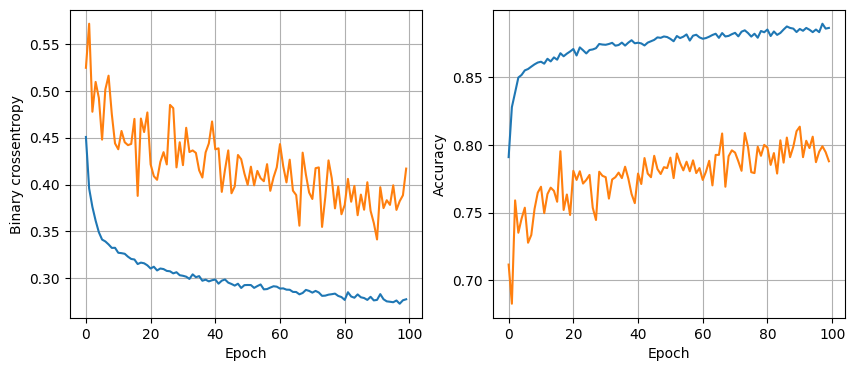

119/119 [==============================] - 0s 2ms/step - loss: 0.3065 - accuracy: 0.8746
64 nodes, dropout 0.2, lr 0.001, batch size 64


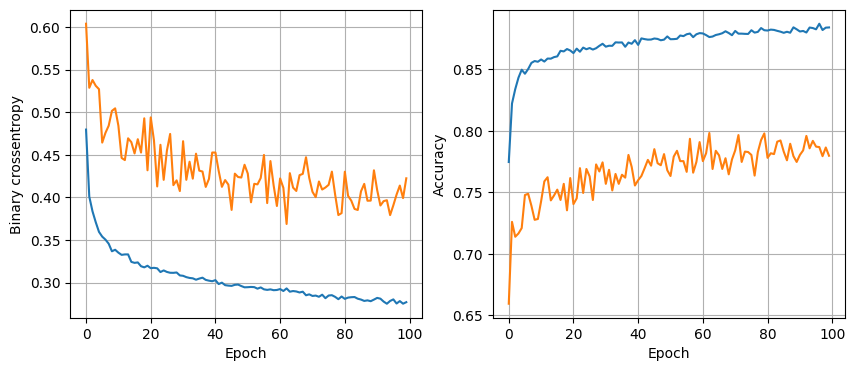

119/119 [==============================] - 0s 3ms/step - loss: 0.3000 - accuracy: 0.8759
64 nodes, dropout 0.2, lr 0.001, batch size 128


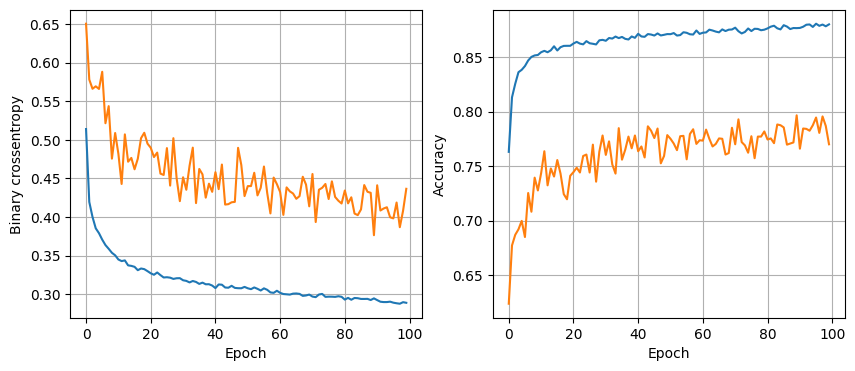

119/119 [==============================] - 0s 3ms/step - loss: 0.3001 - accuracy: 0.8759


In [ ]:
least_val_loss = float('inf') ##initialse to infinity so any model maybe the least
least_loss_model = None #keeping track of the model
#to record which model has the least loss
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")  #for each iteration
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history_lossaccuracy(history)
        #lets also look into the validation dataset's loss
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model #pretty standard

          #blue line is loss, accuracy
          #yellow line is validation loss accuracy

Btw the cell ran for 69 minutes and 45 seconds.
Since the output was made using 54 different iterations through the change in 4 variables, and every iteration was made to run through 100 epochs, the time taken on average to **simulate a single epoch is 0.771 seconds.**
Finally looking into the classification report

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)
#herein we are casting it, anything above 0.5, set it to one (int 1,0)
#then we transform this into a single column of 1s and 0s

119/119 [==============================] - 0s 2ms/step


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.76      0.81      1347
           1       0.88      0.93      0.91      2457

    accuracy                           0.87      3804
   macro avg       0.87      0.85      0.86      3804
weighted avg       0.87      0.87      0.87      3804



The accuracy is pretty high at 87%, equivalent to the SVM classification report.
Model performs similarly to SVM.
Whole point is how we define models and even tho nn are very powerful, other models maybe more appropriate (considering that the SVM took 7 seconds to simulate, whereas the final neural network took 4167 seconds.
Herein, it really doesn't matter.
And there ya have it, we're done with part 1!

# Part 2 - Bikes Dataset

Source: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

Citation: Seoul Bike Sharing Demand. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5F62R.

Data is about bike sharing in Seoul. It predicts rental bike count.

We will once again import libraries, and only run the cells that are within Part 2 of this notebook. They will be run in isolation with Part 1. A similar practice shall also be adopted for Part 3.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression

In [ ]:
bdataset_cols = ["bike_count", "hour", "temp", "humidity", "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]
bpath = "SeoulBikeData.csv"
bike_df = pd.read_csv(bpath).drop(["Date", "Seasons", "Holiday"], axis =1)
bike_df

#if you're facing a UnicodeDecodeError, this is because of the fact that by default, python uses UTF-8 decoding, whereas, the file maybe in UTF-16.
#while you can simply change the decoding as an argument in the read_csv line of code.
#much better that you manually save the excel csv file as a utf-8 decoding format directly from excel.

In [19]:
bike_df.columns = bdataset_cols
bike_df["functional"] = (bike_df["functional"] == "Yes").astype(int)
bike_df

bike_count  hour  temp  humidity  wind  visibility  dew_pt_temp  \
0            254     0  -5.2        37   2.2        2000        -17.6   
1            204     1  -5.5        38   0.8        2000        -17.6   
2            173     2  -6.0        39   1.0        2000        -17.7   
3            107     3  -6.2        40   0.9        2000        -17.6   
4             78     4  -6.0        36   2.3        2000        -18.6   
...          ...   ...   ...       ...   ...         ...          ...   
8755        1003    19   4.2        34   2.6        1894        -10.3   
8756         764    20   3.4        37   2.3        2000         -9.9   
8757         694    21   2.6        39   0.3        1968         -9.9   
8758         712    22   2.1        41   1.0        1859         -9.8   
8759         584    23   1.9        43   1.3        1909         -9.3   

      radiation  rain  snow  functional  
0           0.0   0.0   0.0           1  
1           0.0   0.0   0.0           1  
2           0.0   0.0   0.0           1  
3           0.0   0.0   0.0           1  
4           0.0   0.0   0.0           1  
...         ...   ...   ...         ...  
8755        0.0   0.0   0.0           1  
8756        0.0   0.0   0.0           1  
8757        0.0   0.0   0.0           1  
8758        0.0   0.0   0.0           1  
8759        0.0   0.0   0.0           1  

[8760 rows x 11 columns]

To better train the model by using a smaller sample, the instructor has chosen a single hour - 12 noon (12), and then dropping the hour column altogether.

In [21]:
bike_df = bike_df[bike_df["hour"] ==12]
bike_df.drop(["hour"], axis=1)

bike_count  temp  humidity  wind  visibility  dew_pt_temp  radiation  \
12           449   1.7        23   1.4        2000        -17.2       1.11   
36           479   4.3        41   1.3        1666         -7.8       1.09   
60           333   5.8        85   1.7         349          3.4       0.43   
84           393  -0.3        38   4.8        1823        -12.9       1.11   
108          321  -2.3        25   0.0        1962        -19.7       0.00   
...          ...   ...       ...   ...         ...          ...        ...   
8652         752   9.1        57   1.1         562          1.0       1.69   
8676         672   9.3        61   1.5         390          2.1       0.85   
8700         635   7.9        14   1.7        1688        -18.0       1.81   
8724         661   5.6        27   0.3        1522        -11.9       0.34   
8748         720   6.6        35   1.3        1409         -7.8       1.70   

      rain  snow  functional  
12     0.0   0.0           1  
36     0.0   0.0           1  
60     0.0   0.0           1  
84     0.0   0.0           1  
108    0.0   0.0           1  
...    ...   ...         ...  
8652   0.0   0.0           1  
8676   0.0   0.0           1  
8700   0.0   0.0           1  
8724   0.0   0.0           1  
8748   0.0   0.0           1  

[365 rows x 10 columns]